# Importing Dependencies

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score


# Reading the Dataset

In [3]:
df = pd.read_csv("B:\Projects\Diabetes_Prediction\diabetes.csv")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Aadvik Mazumdar\AppData\Local\Temp\ipykernel_22732\3006391658.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("B:\Projects\Diabetes_Prediction\diabetes.csv")


# Data Analysis

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [ ]:
df.shape

(768, 9)

In [13]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Data Visualization

C:\Users\Aadvik Mazumdar\AppData\Local\Temp\ipykernel_22732\3171644964.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df,x = 'Outcome',palette='viridis')


<Axes: xlabel='Outcome', ylabel='count'>

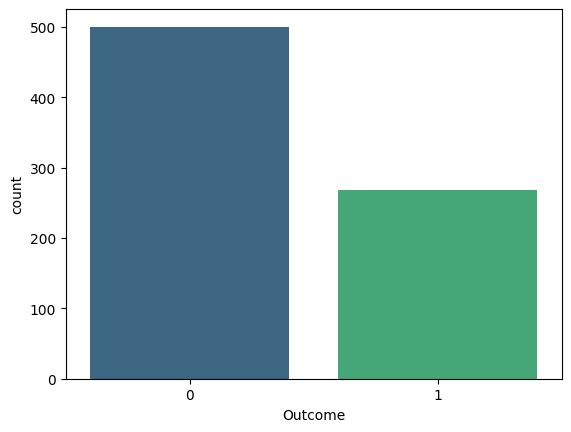

In [19]:
sns.countplot(data = df,x = 'Outcome',palette='viridis')

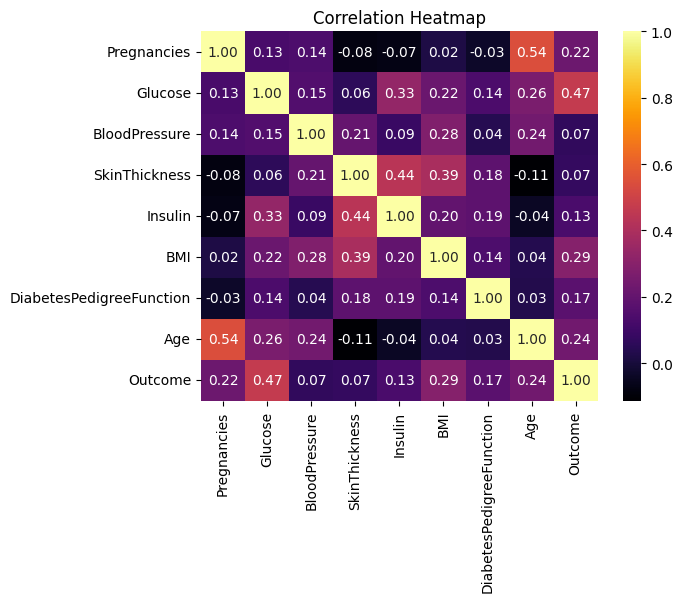

In [30]:
sns.heatmap(df.corr(), annot=True, cmap='inferno', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


C:\Users\Aadvik Mazumdar\AppData\Local\Temp\ipykernel_22732\2708181928.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='Insulin', palette='inferno')


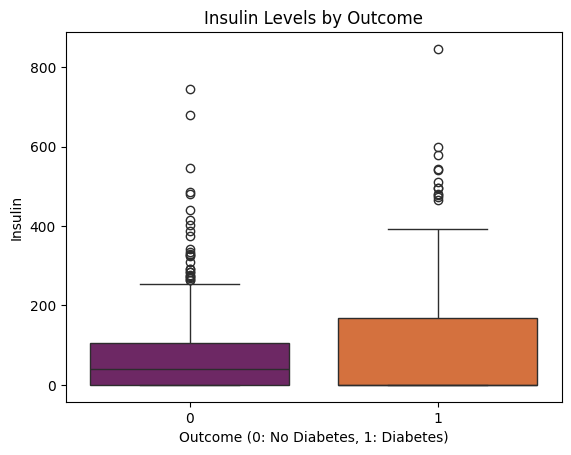

In [36]:
sns.boxplot(data=df, x='Outcome', y='Insulin', palette='inferno')
plt.title("Insulin Levels by Outcome")
plt.xlabel("Outcome (0: No Diabetes, 1: Diabetes)")
plt.ylabel("Insulin")
plt.show()


C:\Users\Aadvik Mazumdar\AppData\Local\Temp\ipykernel_22732\2575745757.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='Glucose', palette='inferno')


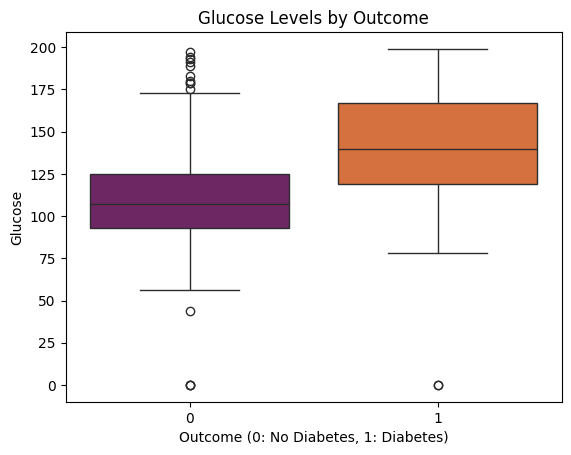

In [35]:
sns.boxplot(data=df, x='Outcome', y='Glucose', palette='inferno')
plt.title("Glucose Levels by Outcome")
plt.xlabel("Outcome (0: No Diabetes, 1: Diabetes)")
plt.ylabel("Glucose")
plt.show()

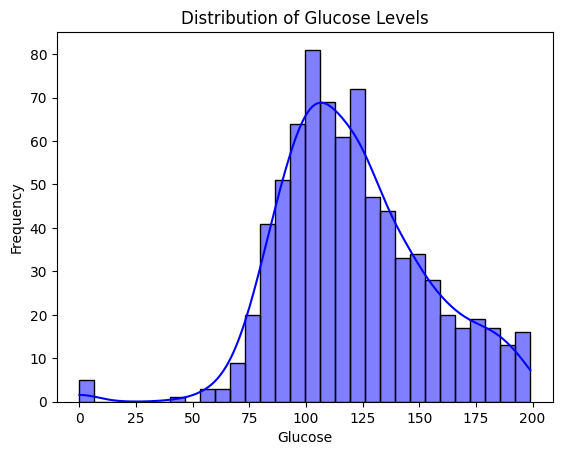

In [38]:
sns.histplot(df['Glucose'], kde=True, color='blue', bins=30)
plt.title("Distribution of Glucose Levels")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()


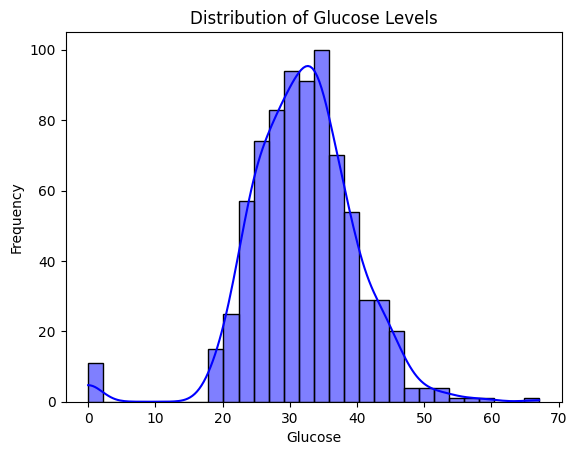

In [ ]:
sns.histplot(df['BMI'], kde=True, color='blue', bins=30)
plt.title("Distribution of BMI Levels")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()


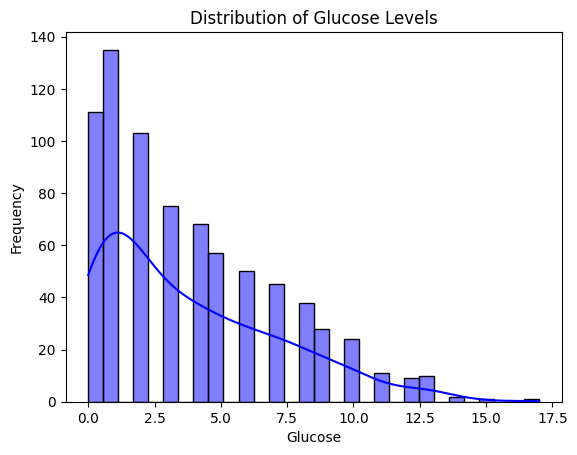

In [ ]:
sns.histplot(df['Pregnancies'], kde=True, color='blue', bins=30)
plt.title("Distribution of Pregnancies Levels")
plt.xlabel("Pregnancies")
plt.ylabel("Frequency")
plt.show()


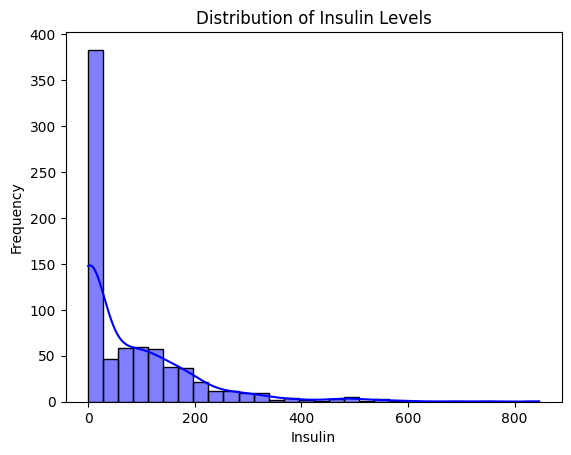

In [41]:
sns.histplot(df['Insulin'], kde=True, color='blue', bins=30)
plt.title("Distribution of Insulin Levels")
plt.xlabel("Insulin")
plt.ylabel("Frequency")
plt.show()


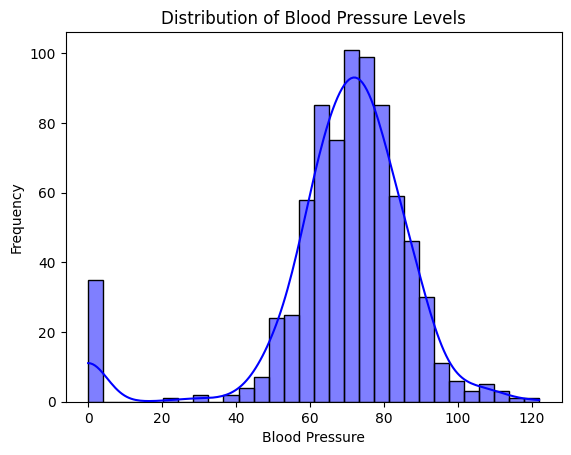

In [44]:
sns.histplot(df['BloodPressure'], kde=True, color='blue', bins=30)
plt.title("Distribution of Blood Pressure Levels")
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")
plt.show()


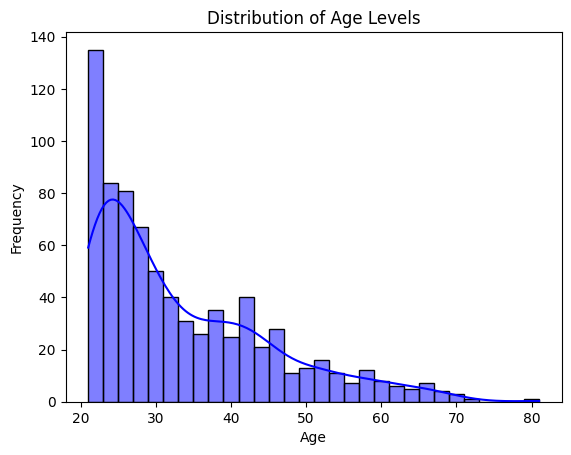

In [ ]:
sns.histplot(df['Age'], kde=True, color='blue', bins=30)
plt.title("Distribution of Age Levels")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


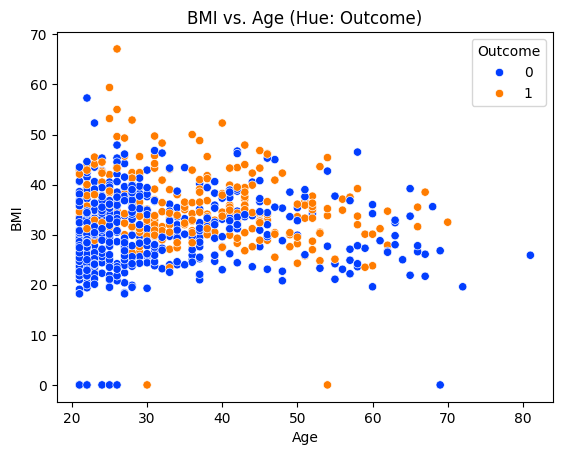

In [59]:
sns.scatterplot(data=df, x='Age', y='BMI', hue='Outcome', palette='bright')
plt.title("BMI vs. Age (Hue: Outcome)")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()


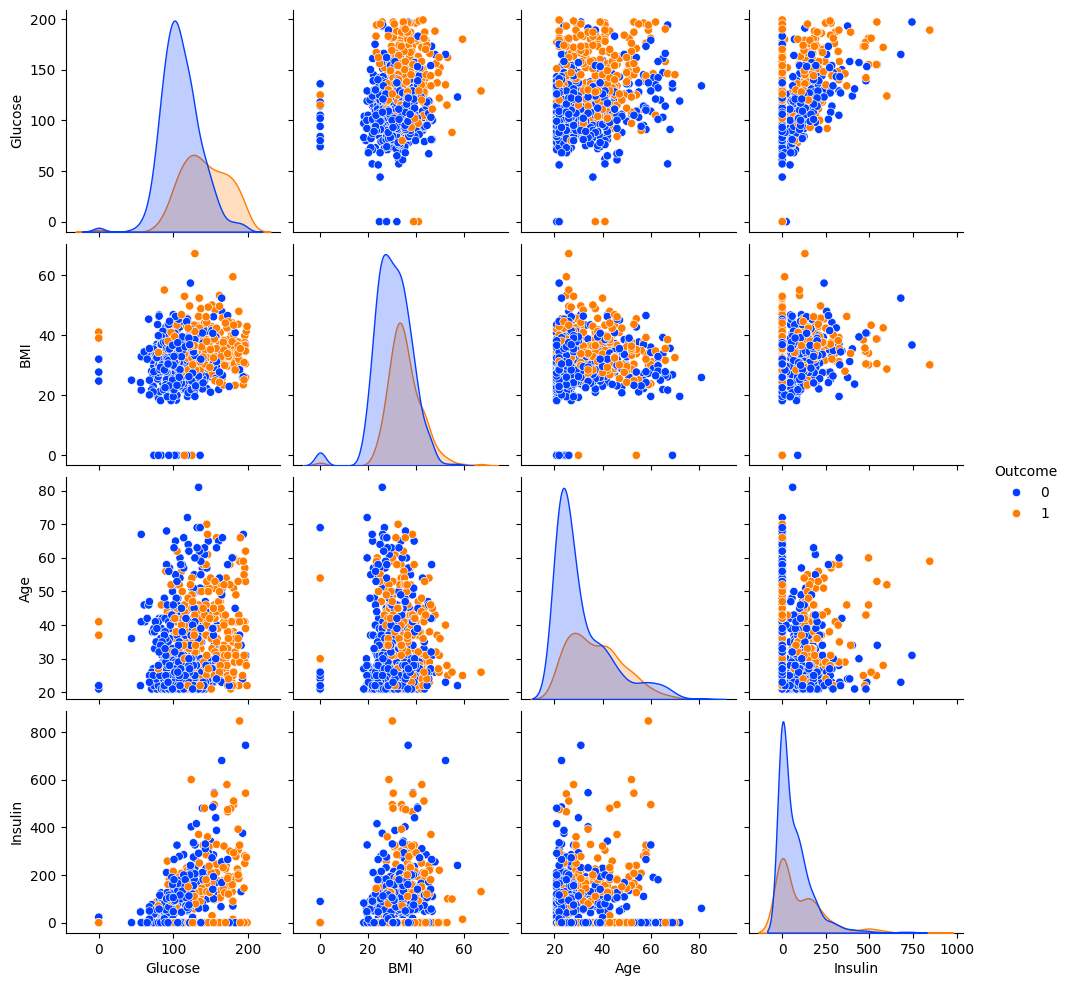

In [61]:
sns.pairplot(df, vars=['Glucose', 'BMI', 'Age', 'Insulin'], hue='Outcome', palette='bright')
plt.show()
